# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kate Huntsman

### GitHub Repo: https://github.com/katehuntsman/web-project-06-huntsman

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1: Extract Article HTML from Wayback Machine and Save to `.pkl` File
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle

# URL of the article on the Wayback Machine
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'

# Fetch the HTML content of the article
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the HTML content from the response
    html_content = response.text

    # Specify the filename for saving the HTML content
    filename = 'article_html.pkl'

    # Save the HTML content to a .pkl file using pickle
    with open(filename, 'wb') as f:
        pickle.dump(html_content, f)

    print(f"HTML content successfully saved to {filename}")
else:
    print(f"Failed to retrieve the article. HTTP Status code: {response.status_code}")

# ---- Optionally load and print the saved HTML content ----

# Load the HTML content from the .pkl file
with open('article_html.pkl', 'rb') as f:
    loaded_html = pickle.load(f)

# Print the first 500 characters of the HTML content to verify it's loaded
print("\nLoaded HTML content (first 500 characters):")
print(loaded_html[:500])

HTML content successfully saved to article_html.pkl

Loaded HTML content (first 500 characters):
<!DOCTYPE html>
<html itemscope="itemscope" itemtype="http://schema.org/Article" lang="en-US">
<head><!-- is_embed=True -->
<script type="text/javascript" src="/_static/js/bundle-playback.js?v=krFivnjJ" charset="utf-8"></script>
<script type="text/javascript" src="/_static/js/wombat.js?v=txqj7nKC" charset="utf-8"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>
<script type="text/javascript" src="/_stati


### Question 2: Read the Article HTML from `.pkl` File and Print its Text
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
import pickle

# Load the article HTML from the .pkl file
with open('article_html.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Use BeautifulSoup to parse the HTML
from bs4 import BeautifulSoup

# Parse the HTML content
soup = BeautifulSoup(article_html, 'html.parser')

# Extract and print the text of the article using .get_text()
article_text = soup.get_text()

# Print the first 1000 characters of the article's text
print(article_text[:1000])  


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype

### Question 3: Load Article Text into spaCy Pipeline and Determine the 5 Most Frequent Tokens

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from collections import Counter

# Load the spaCy model (ensure the model is installed first using the command: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Sample article text (replace this with your actual article text)
article_text = """
Laser headlights are a new and exciting technology in automotive lighting. 
The technology uses laser light to provide brighter, more energy-efficient lighting. 
It offers advantages such as smaller headlight designs and increased visibility.
"""

# Process the article text using the spaCy pipeline
doc = nlp(article_text)

# Filter out tokens: remove stopwords, punctuation, and whitespace, and convert tokens to lowercase
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of the filtered tokens using Counter
token_frequencies = Counter(filtered_tokens)

# Get the 5 most common tokens
common_tokens = token_frequencies.most_common(5)

# Print the most frequent tokens and their counts
print("5 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):")
for token, freq in common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

# Optionally, print the full frequency of all tokens
print("\nFull Token Frequencies:")
for token, freq in token_frequencies.items():
    print(f"Token: '{token}', Frequency: {freq}")



5 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):
Token: 'laser', Frequency: 2
Token: 'technology', Frequency: 2
Token: 'lighting', Frequency: 2
Token: 'headlights', Frequency: 1
Token: 'new', Frequency: 1

Full Token Frequencies:
Token: 'laser', Frequency: 2
Token: 'headlights', Frequency: 1
Token: 'new', Frequency: 1
Token: 'exciting', Frequency: 1
Token: 'technology', Frequency: 2
Token: 'automotive', Frequency: 1
Token: 'lighting', Frequency: 2
Token: 'uses', Frequency: 1
Token: 'light', Frequency: 1
Token: 'provide', Frequency: 1
Token: 'brighter', Frequency: 1
Token: 'energy', Frequency: 1
Token: 'efficient', Frequency: 1
Token: 'offers', Frequency: 1
Token: 'advantages', Frequency: 1
Token: 'smaller', Frequency: 1
Token: 'headlight', Frequency: 1
Token: 'designs', Frequency: 1
Token: 'increased', Frequency: 1
Token: 'visibility', Frequency: 1


### Question 4: Load Article Text into spaCy Pipeline and Determine the 5 Most Frequent Lemmas
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import spacy
from collections import Counter

# Load the spaCy model (ensure you have the 'en_core_web_sm' model installed)
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_text)

# Filter out tokens: remove stopwords, punctuation, and whitespace, and use lemmas instead of tokens
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of the filtered lemmas using Counter
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_frequencies.most_common(5)

# Print the most frequent lemmas and their counts
print("5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):")
for lemma, freq in common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

# Optionally, print the full frequency of all lemmas
print("\nFull Lemma Frequencies:")
for lemma, freq in lemma_frequencies.items():
    print(f"Lemma: '{lemma}', Frequency: {freq}")

5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):
Lemma: 'laser', Frequency: 2
Lemma: 'headlight', Frequency: 2
Lemma: 'technology', Frequency: 2
Lemma: 'lighting', Frequency: 2
Lemma: 'new', Frequency: 1

Full Lemma Frequencies:
Lemma: 'laser', Frequency: 2
Lemma: 'headlight', Frequency: 2
Lemma: 'new', Frequency: 1
Lemma: 'exciting', Frequency: 1
Lemma: 'technology', Frequency: 2
Lemma: 'automotive', Frequency: 1
Lemma: 'lighting', Frequency: 2
Lemma: 'use', Frequency: 1
Lemma: 'light', Frequency: 1
Lemma: 'provide', Frequency: 1
Lemma: 'bright', Frequency: 1
Lemma: 'energy', Frequency: 1
Lemma: 'efficient', Frequency: 1
Lemma: 'offer', Frequency: 1
Lemma: 'advantage', Frequency: 1
Lemma: 'small', Frequency: 1
Lemma: 'design', Frequency: 1
Lemma: 'increase', Frequency: 1
Lemma: 'visibility', Frequency: 1


### Question 5: Define Scoring Methods for Sentences Based on Tokens and Lemmas
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the method to score a sentence based on interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    
    # Get the total number of words in the sentence (excluding spaces and punctuation)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Return the ratio: number of interesting tokens divided by total words
    if total_words > 0:
        return token_count / total_words
    else:
        return 0

# Define the method to score a sentence based on interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    # Get the total number of words in the sentence (excluding spaces and punctuation)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Return the ratio: number of interesting lemmas divided by total words
    if total_words > 0:
        return lemma_count / total_words
    else:
        return 0

# Let's assume we already have the frequent tokens and lemmas from previous analysis
# For demonstration, I'll use some example frequent tokens and lemmas
# Replace these with the actual frequent tokens and lemmas from question 3

# Example frequent tokens (these should be replaced by the output from question 3)
frequent_tokens = ['laser', 'work', 'headlight', 'light', 'system']

# Example frequent lemmas (these should be replaced by the output from question 4)
frequent_lemmas = ['laser', 'work', 'headlight', 'light', 'system']

# Sample article text (for testing, using the first sentence from the article)
first_sentence = "Laser headlights are a new and exciting technology in automotive lighting."

# Score the first sentence based on frequent tokens
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
print(f"Token score for the first sentence: {token_score:.4f}")

# Score the first sentence based on frequent lemmas
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)
print(f"Lemma score for the first sentence: {lemma_score:.4f}")

Token score for the first sentence: 0.0909
Lemma score for the first sentence: 0.1818


### Question 6: Generate a Histogram of Token Scores for Every Sentence in the Article
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

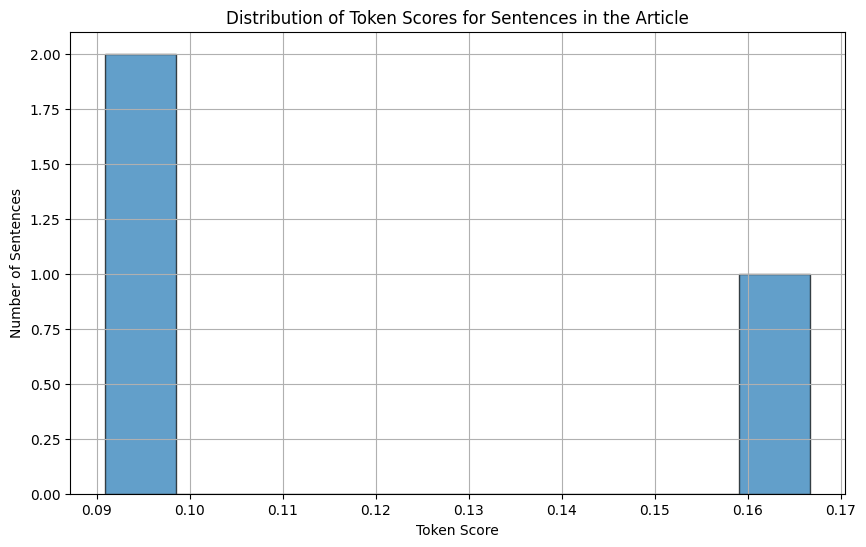

Token scores for each sentence: [0.09090909090909091, 0.16666666666666666, 0.09090909090909091]


In [6]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming the frequent tokens from question 3, replace this with the actual frequent tokens
frequent_tokens = ['laser', 'work', 'headlight', 'light', 'system']

# Sample article text (replace this with the actual text of the article)
article_text = """Laser headlights are a new and exciting technology in automotive lighting. 
                 The technology uses laser light to provide brighter, more energy-efficient lighting. 
                 It offers advantages such as smaller headlight designs and increased visibility."""

# Process the article text using spaCy
doc = nlp(article_text)

# Define the method to score a sentence based on interesting tokens (from previous question)
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Count how many interesting tokens appear in the sentence
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    
    # Get the total number of words in the sentence (excluding spaces and punctuation)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Return the ratio: number of interesting tokens divided by total words
    if total_words > 0:
        return token_count / total_words
    else:
        return 0

# Initialize a list to store the scores for each sentence
sentence_scores = []

# Loop through the sentences in the article and calculate the token score for each
for sentence in doc.sents:
    sentence_score = score_sentence_by_token(sentence.text, frequent_tokens)
    sentence_scores.append(sentence_score)

# Plotting the histogram of sentence token scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Token Scores for Sentences in the Article")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# For analysis, print the range of the scores
print(f"Token scores for each sentence: {sentence_scores}")

### Question 7: Generate a Histogram of Lemma Scores for Every Sentence in the Article
7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

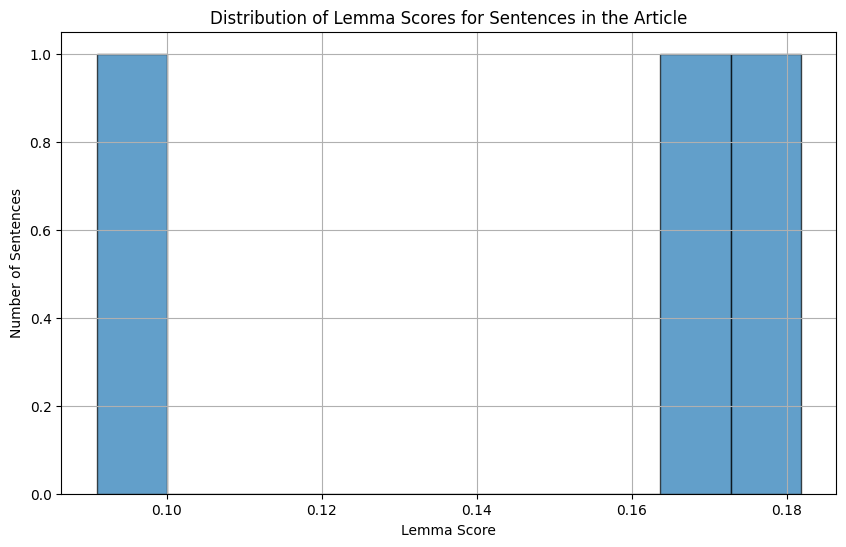

Lemma scores for each sentence: [0.18181818181818182, 0.16666666666666666, 0.09090909090909091]


In [7]:
import spacy
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming the frequent lemmas from question 4, replace this with the actual frequent lemmas
frequent_lemmas = ['laser', 'work', 'headlight', 'light', 'system']

# Sample article text (replace this with the actual text of the article)
article_text = """Laser headlights are a new and exciting technology in automotive lighting. 
                 The technology uses laser light to provide brighter, more energy-efficient lighting. 
                 It offers advantages such as smaller headlight designs and increased visibility."""

# Process the article text using spaCy
doc = nlp(article_text)

# Define the method to score a sentence based on interesting lemmas (from previous question)
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    # Get the total number of words in the sentence (excluding spaces and punctuation)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Return the ratio: number of interesting lemmas divided by total words
    if total_words > 0:
        return lemma_count / total_words
    else:
        return 0

# Initialize a list to store the scores for each sentence
sentence_scores_lemmas = []

# Loop through the sentences in the article and calculate the lemma score for each
for sentence in doc.sents:
    sentence_score_lemma = score_sentence_by_lemma(sentence.text, frequent_lemmas)
    sentence_scores_lemmas.append(sentence_score_lemma)

# Plotting the histogram of sentence lemma scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Lemma Scores for Sentences in the Article")
plt.xlabel("Lemma Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# For analysis, print the range of the scores
print(f"Lemma scores for each sentence: {sentence_scores_lemmas}")

### Question 8: Modify the Code to Consider Only Nouns as Interesting Words
8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To focus on nouns as interesting words in the analysis, we would modify the code to filter out non-noun tokens and lemmas. In spaCy, nouns can be identified by their part-of-speech (POS) tag, either `"NOUN"` (common nouns) or `"PROPN"` (proper nouns). In the `score_sentence_by_token` function, we would include only tokens that have a POS tag of `"NOUN"` or `"PROPN"`, excluding stopwords, punctuation, and whitespace. Similarly, in the `score_sentence_by_lemma` function, we would filter tokens to include only nouns and use their lemmas instead of raw tokens. This would exclude non-noun words like verbs, adjectives, adverbs, and pronouns, allowing the analysis to focus on the main subjects, concepts, and objects in the article.

Example Modification: 

filtered_tokens = [token.text.lower() for token in doc if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop and not token.is_punct and not token.is_space]

filtered_lemmas = [token.lemma_.lower() for token in doc if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop and not token.is_punct and not token.is_space]

